# Correlaciones
Cuando se tienen variables altamente correlacionadas es recomendable trabajar solo con una de ellas, ya que una puede proporcionar información de la otra por lo que incluir las dos estaría de más. La reducción de datos simplificaría el costo computacional por lo que es de vital importancia la reducción de variables cuando se pueda.

La **varianza** se define como $\sigma^2$; es decir:
$$ \sigma^2 = \dfrac{1}{N-1} \sum_{i=1}^{N} (x_i -\mu)^2$$

La **covarianza** es una medida de la variacion de una variable X con respecto a otra variable Y.
$$cov(x,y) = \dfrac{1}{N-1} \sum_{i=1}^{N}(x_i - \bar{x})(y_i-\bar{y})$$

Las componentes pueden que esten en distintas mediciones y órdenes de magnitud, por lo que al concepto de covarianza se divide entre las desviaciones estandar para tener un valor más estandarizado. Definimos entonces al **coeficiente de correlación** como:
$$ \rho = \dfrac{cov(x,y)}{\sigma_x \sigma_y}$$
Donde
$$-1 \leq \rho \leq 1$$
Si $\rho$ es cercana a -1 entonces se dice que existe una correlación negativa y a medida de que aumenta una, la otra decrece. Si es cercana a 1 sucede el caso contrario y se dice que existe una correlación positiva.

### Matriz de covarianza
Dado un dataset con muchas variables, podemos definir una matriz de correlación que incluye las correlaciones entre todas las variables:
$$\begin{pmatrix}
\sigma_{x}^2 &  \sigma_{xy} &  \cdots \\ 
\sigma_{yx} &  \sigma_{y}^2 & \vdots   \\ 
\vdots  & \cdots &  \ddots  
\end{pmatrix}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

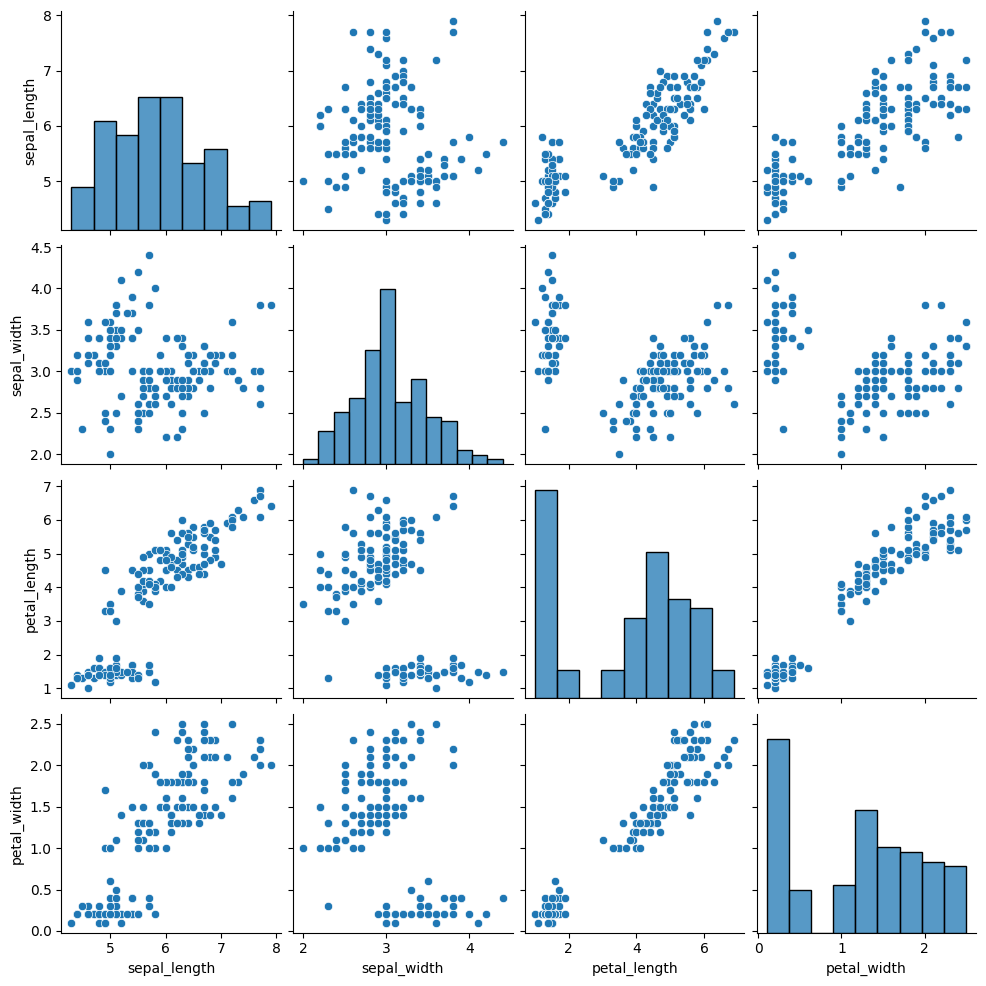

In [3]:
#visualizamos las relaciones e histogramas de los datos
sns.pairplot(data = iris)

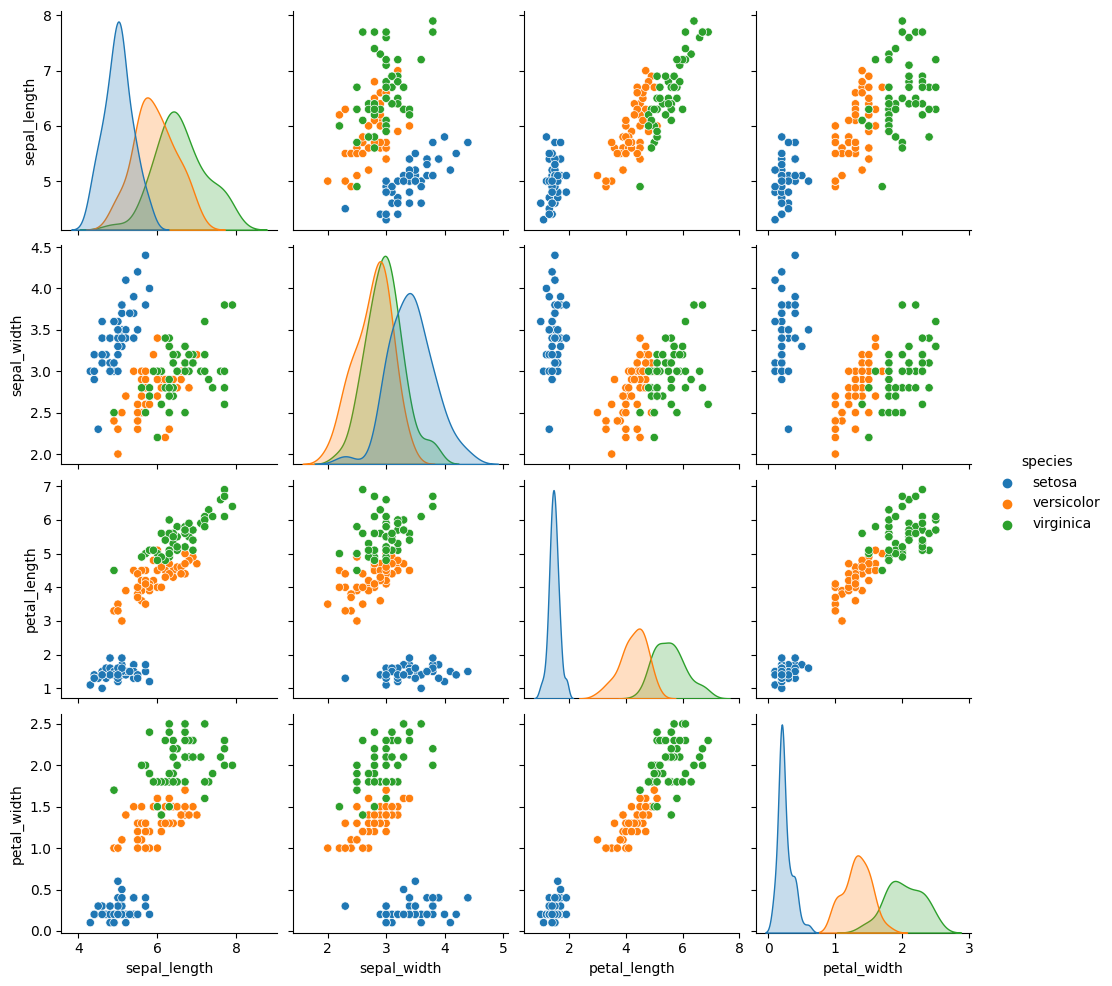

In [4]:
#dividimos por cada categoría
sns.pairplot(data = iris, hue = 'species')

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
# creamos un escalamiento de los datos
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
# lo que obtenemos son datos ya estandarizados
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [11]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

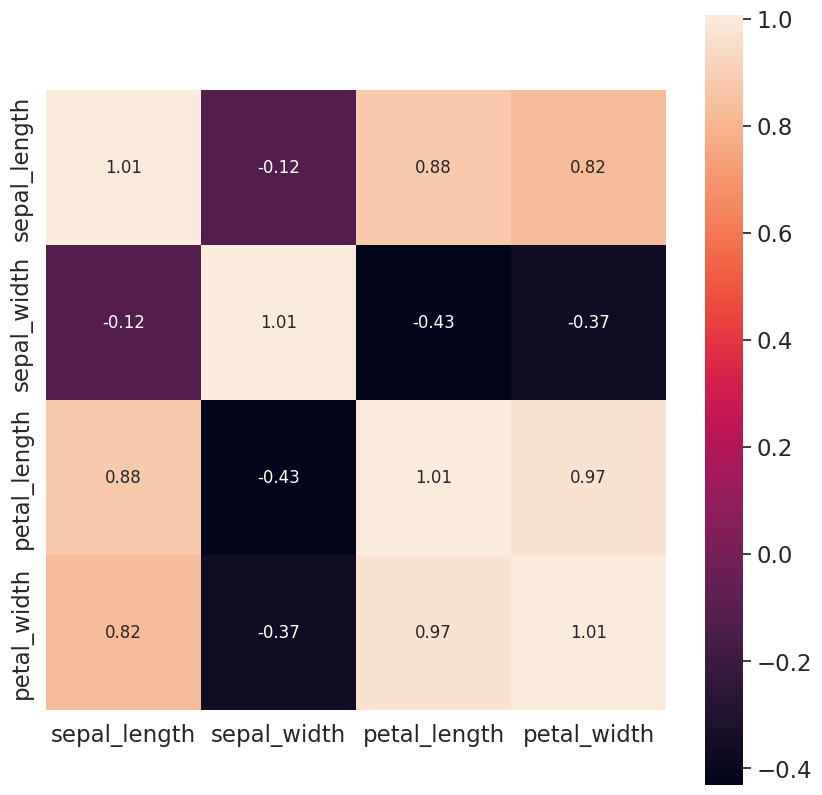

In [12]:
# mapa de calor para visualizar mejor la matriz de covarianza
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Análisis de componentes principales (PCA)

Es una técnica matemática de reducción de variables (dimensionalidad) y se utiliza cuando existen variables altamente correlacionadas. Está basada en conceptos de algebra lineal y sirve para entrenar algortimos de machine learning con la información mínima posible.

In [13]:
# ya cargamos el dataset iris y su respectiva matriz de covarianza
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

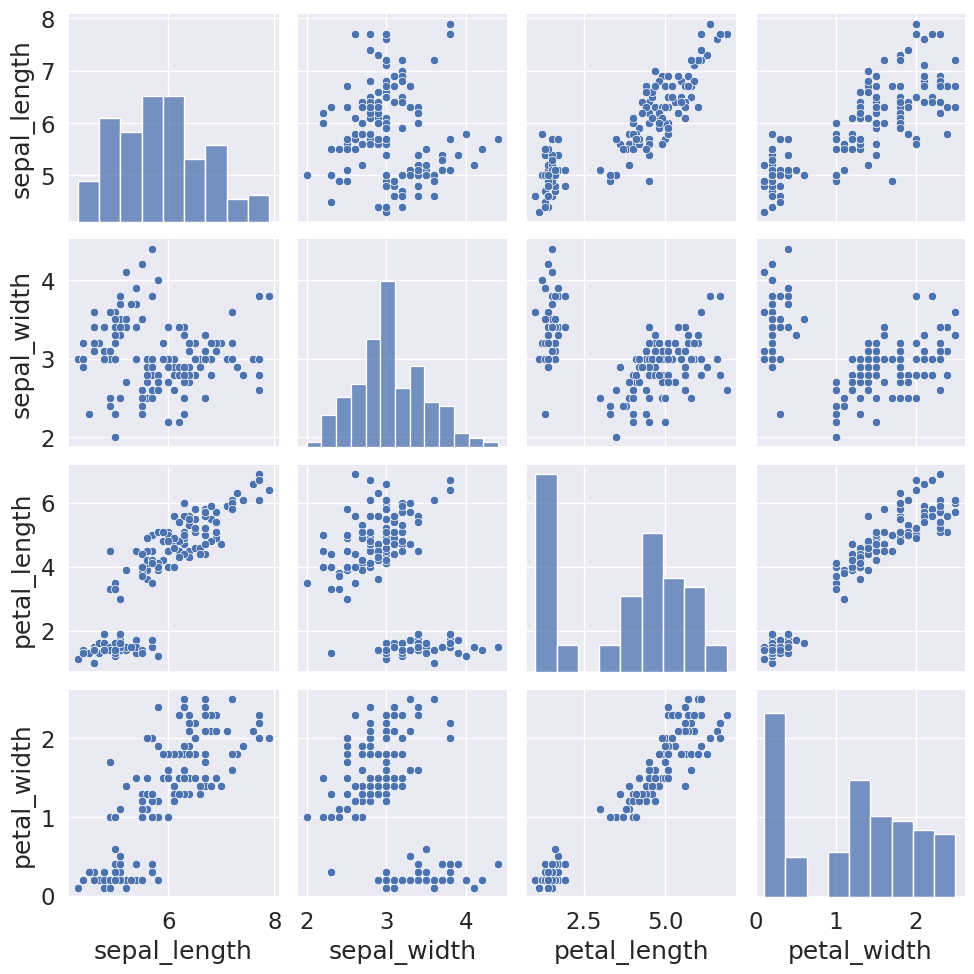

In [14]:
#con esta grafica podemos identificar las variables mas correlacionadas
# entre ellas son la componente 'petal_lenght' y 'petal_width'
sns.pairplot(iris)

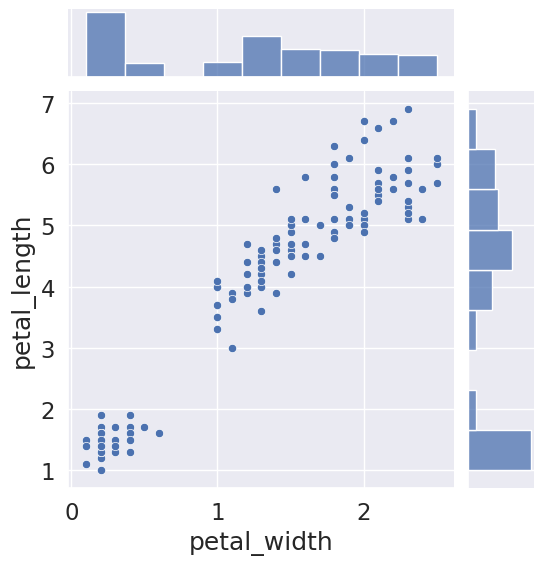

In [16]:
#nos enfocamos en solo las siguientes variables
sns.jointplot(x = iris['petal_width'], y = iris['petal_length'])


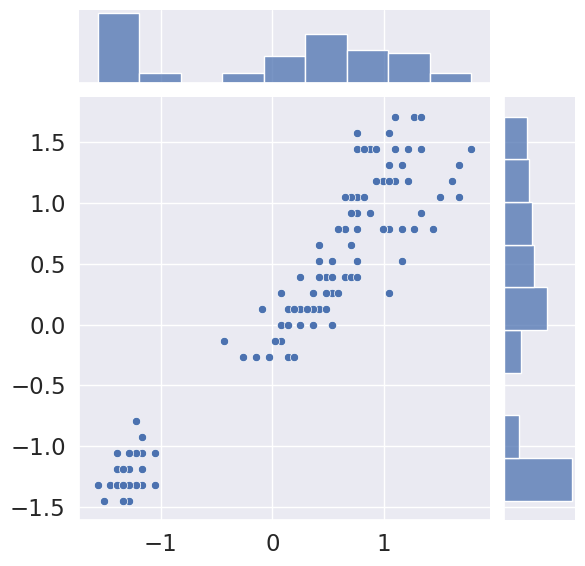

In [18]:
#nos enfocamos en las mismas variables estandarizadas
sns.jointplot(x = scaled[:,2], y = scaled[:,3])

Descomposición en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [19]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [20]:
#4 numeros por ser una matriz 4x4
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [21]:
#4 vectores columna, cada columa representa un vector propio
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [22]:
# varianza por cada una de las direcciones principales
# a mayor varianza, mayor informacion almacenada
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]


In [23]:
from sklearn.decomposition import PCA

#reducir mis datos a dos componentes
pca = PCA(n_components=2)
#trabajamos sobre los datos escalados
pca.fit(scaled)

PCA(n_components=2)

In [24]:
# porcentaje de varianza que abarcan las primeras 
# dos direcciones principales
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [26]:
# reduccion de dimensionalidad
# en vez de 4 columnas ahora tenemos 2
reduced_scaled = pca.transform(scaled)
reduced_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

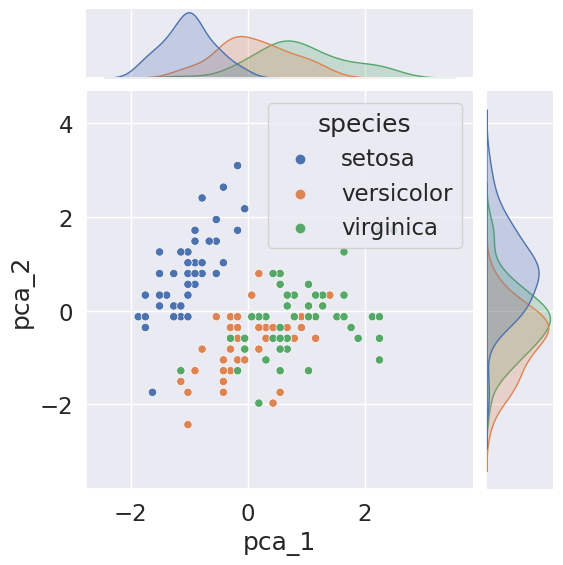

In [30]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]
sns.jointplot(x = iris['pca_1'], y = iris['pca_2'], hue = iris['species'])